<a href="https://colab.research.google.com/github/shreyasstha/data/blob/main/Joining_data_inPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

student = pd.read_csv("student.csv")
score = pd.read_csv("score.csv")
classroom = pd.read_csv("classroom.csv")

print(student)
print(score)
print(classroom)

   student_id student_name  age  gender
0         101        Alice   20  Female
1         102          Bob   22    Male
2         103      Charlie   21    Male
3         104        David   23    Male
4         105          Eva   22  Female
   student_id  subject  score
0         101     Math     88
1         102  Science     75
2         103  English     92
3         101  Science     81
4         104     Math     67
5         105  English     78
6         102     Math     85
   subject teacher_name classroom
0     Math    Mr.Sharma      A101
1  Science     Ms.Karki      B202
2  English    Mrs.Joshi      C303
3   Nepali      Mr.Lama      D404


#merge table

In [ ]:
student_details = pd.merge(student, score, on="student_id")
print(student_details)

   student_id student_name  age  gender  subject  score
0         101        Alice   20  Female     Math     88
1         101        Alice   20  Female  Science     81
2         102          Bob   22    Male  Science     75
3         102          Bob   22    Male     Math     85
4         103      Charlie   21    Male  English     92
5         104        David   23    Male     Math     67
6         105          Eva   22  Female  English     78


In [ ]:
print(student.merge(score, on="student_id", how="left"))
#left_join =>all the rows from left side and only the rows from right side with matching values
#join = inner, left, right, outer
#same result as above

   student_id student_name  age  gender  subject  score
0         101        Alice   20  Female     Math     88
1         101        Alice   20  Female  Science     81
2         102          Bob   22    Male  Science     75
3         102          Bob   22    Male     Math     85
4         103      Charlie   21    Male  English     92
5         104        David   23    Male     Math     67
6         105          Eva   22  Female  English     78


In [ ]:
score_to_subject = score.merge(classroom, on="subject")

c = score_to_subject["subject"] == "English"
english = score_to_subject[c]

c = score_to_subject["subject"] == "Math"
math = score_to_subject[c]

english_math = english.merge(math, on="subject", how="outer", suffixes=("_eng", "_math"))

print(english_math)

   student_id_eng  subject  score_eng teacher_name_eng classroom_eng  \
0           103.0  English       92.0        Mrs.Joshi          C303   
1           105.0  English       78.0        Mrs.Joshi          C303   
2             NaN     Math        NaN              NaN           NaN   
3             NaN     Math        NaN              NaN           NaN   
4             NaN     Math        NaN              NaN           NaN   

   student_id_math  score_math teacher_name_math classroom_math  
0              NaN         NaN               NaN            NaN  
1              NaN         NaN               NaN            NaN  
2            101.0        88.0         Mr.Sharma           A101  
3            104.0        67.0         Mr.Sharma           A101  
4            102.0        85.0         Mr.Sharma           A101  


In [ ]:
student_score = pd.merge(student ,score, on="student_id")

print(student_score)

print(student.shape)
print(student_score.shape)

   student_id student_name  age  gender  subject  score
0         101        Alice   20  Female     Math     88
1         101        Alice   20  Female  Science     81
2         102          Bob   22    Male  Science     75
3         102          Bob   22    Male     Math     85
4         103      Charlie   21    Male  English     92
5         104        David   23    Male     Math     67
6         105          Eva   22  Female  English     78
(5, 4)
(7, 6)


In [ ]:
# First join students with scores
student_scores = pd.merge(student, score, on="student_id")

# Then join with classrooms using the subject
full_data = pd.merge(student_scores, classroom, on="subject")

print(full_data)


   student_id student_name  age  gender  subject  score teacher_name classroom
0         101        Alice   20  Female     Math     88    Mr.Sharma      A101
1         101        Alice   20  Female  Science     81     Ms.Karki      B202
2         102          Bob   22    Male  Science     75     Ms.Karki      B202
3         102          Bob   22    Male     Math     85    Mr.Sharma      A101
4         103      Charlie   21    Male  English     92    Mrs.Joshi      C303
5         104        David   23    Male     Math     67    Mr.Sharma      A101
6         105          Eva   22  Female  English     78    Mrs.Joshi      C303


In [ ]:
print(score.merge(classroom, on="subject"))

   student_id  subject  score teacher_name classroom
0         101     Math     88    Mr.Sharma      A101
1         102  Science     75     Ms.Karki      B202
2         103  English     92    Mrs.Joshi      C303
3         101  Science     81     Ms.Karki      B202
4         104     Math     67    Mr.Sharma      A101
5         105  English     78    Mrs.Joshi      C303
6         102     Math     85    Mr.Sharma      A101


In [ ]:
student_score_classromm = student.merge(score, on ="student_id")\
                                 .merge(classroom, on ="subject")
print(student_score_classromm)

   student_id student_name  age  gender  subject  score teacher_name classroom
0         101        Alice   20  Female     Math     88    Mr.Sharma      A101
1         101        Alice   20  Female  Science     81     Ms.Karki      B202
2         102          Bob   22    Male  Science     75     Ms.Karki      B202
3         102          Bob   22    Male     Math     85    Mr.Sharma      A101
4         103      Charlie   21    Male  English     92    Mrs.Joshi      C303
5         104        David   23    Male     Math     67    Mr.Sharma      A101
6         105          Eva   22  Female  English     78    Mrs.Joshi      C303


<Axes: xlabel='subject'>

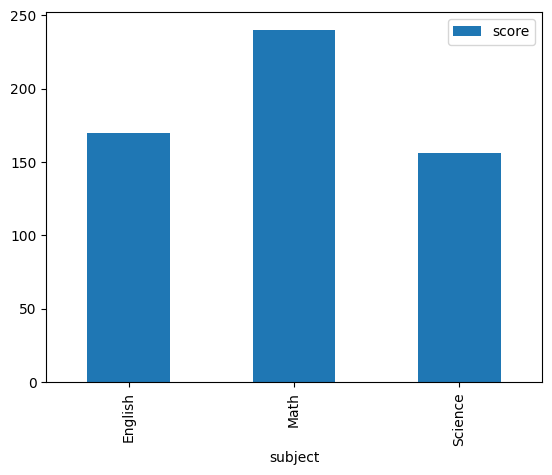

In [ ]:
student_score_classromm.groupby("subject").agg("sum").plot(kind="bar", y= "score")

#filtering join

In [8]:
student_score = student.merge(score, on="student_id",
                            how='left', indicator=True)  #indicator gives _merge column
print(student_score)


   student_id student_name  age  gender  subject  score _merge
0         101        Alice   20  Female     Math     88   both
1         101        Alice   20  Female  Science     81   both
2         102          Bob   22    Male  Science     75   both
3         102          Bob   22    Male     Math     85   both
4         103      Charlie   21    Male  English     92   both
5         104        David   23    Male     Math     67   both
6         105          Eva   22  Female  English     78   both


In [9]:
st_id_list = student.loc[student_score["_merge"] == "both", "student_id"]
print(st_id_list)

0    101
1    102
2    103
3    104
4    105
Name: student_id, dtype: int64


In [10]:
print(student[student["student_id"].isin(st_id_list)])

   student_id student_name  age  gender
0         101        Alice   20  Female
1         102          Bob   22    Male
2         103      Charlie   21    Male
3         104        David   23    Male
4         105          Eva   22  Female


In [12]:
#merge scoere and classroom
score_class = score.merge(classroom, on="subject", how="inner")
print(score_class)

   student_id  subject  score teacher_name classroom
0         101     Math     88    Mr.Sharma      A101
1         102  Science     75     Ms.Karki      B202
2         103  English     92    Mrs.Joshi      C303
3         101  Science     81     Ms.Karki      B202
4         104     Math     67    Mr.Sharma      A101
5         105  English     78    Mrs.Joshi      C303
6         102     Math     85    Mr.Sharma      A101


In [15]:
# Use .isin() to subset
top_studet = score[score['subject'].isin(score_class["subject"])]
print(top_studet)

   student_id  subject  score
0         101     Math     88
1         102  Science     75
2         103  English     92
3         101  Science     81
4         104     Math     67
5         105  English     78
6         102     Math     85


In [21]:
cnt_by_id = top_studet.groupby(['student_id'], as_index=False).agg({'subject':"count"})
print(cnt_by_id)

   student_id  subject
0         101        2
1         102        2
2         103        1
3         104        1
4         105        1


In [22]:
# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_id.merge(student, on="student_id"))

   student_id  subject student_name  age  gender
0         101        2        Alice   20  Female
1         102        2          Bob   22    Male
2         103        1      Charlie   21    Male
3         104        1        David   23    Male
4         105        1          Eva   22  Female
